# Project - Statistical Performance Indicators (SPI)

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- What can Statistical Performance Indicators (SPI) tells us?
- Investigate regional SPI score
- SPI correlation with GDP per capita

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Explore the problem
- [Read about the SPI on World Bank](https://www.worldbank.org/en/programs/statistical-performance-indicators/about-spi)

### Step 1.b: Identify and download data
- The World bank data for SPI and GDP per capita:
        - [SPI](https://data.worldbank.org/indicator/IQ.SPI.OVRL)
        - [GDP per capita](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)

### Step 1.c: Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.d: Read SPI data

In [2]:
spi = pd.read_csv('files/SPI/API_IQ.SPI.OVRL_DS2_en_csv_v2_3186678.csv', skiprows=4)
meta = pd.read_csv('files/SPI/Metadata_Country_API_IQ.SPI.OVRL_DS2_en_csv_v2_3186678.csv')
gdp = pd.read_csv('files/SPI/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3159040.csv', skiprows = 4)

### Step 1.e: Inspect the data

In [3]:
spi.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Statistical performance indicators (SPI): Over...,IQ.SPI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Statistical performance indicators (SPI): Over...,IQ.SPI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Statistical performance indicators (SPI): Over...,IQ.SPI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,37.222917,42.577917,49.845000,49.756250,NaN,NaN
3,Africa Western and Central,AFW,Statistical performance indicators (SPI): Over...,IQ.SPI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Statistical performance indicators (SPI): Over...,IQ.SPI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,43.735417,46.689583,55.232083,54.945833,NaN,NaN


In [4]:
meta.head()


,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [5]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.836769,147.238537,156.426780,182.521139,162.594548,180.489043,...,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473,1534.171767,1485.307425,1330.140232,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.963779,113.114697,118.865837,123.478967,131.892939,138.566819,...,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869,NaN


## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Remove columns


In [6]:
spi = spi.loc[:, ['Country Code', '2019']]
spi.head()

,Country Code,2019
0,ABW,NaN
1,AFE,NaN
2,AFG,49.756250
3,AFW,NaN
4,AGO,54.945833


In [7]:
gdp = gdp.loc[:, ['Country Code', '2019']]
gdp.head()

,Country Code,2019
0,ABW,NaN
1,AFE,1485.307425
2,AFG,507.103392
3,AFW,1772.339155
4,AGO,2809.626088


In [8]:
meta = meta.loc[:,['Country Code', 'Region']]
meta.head()


,Country Code,Region
0,ABW,Latin America & Caribbean
1,AFE,NaN
2,AFG,South Asia
3,AFW,NaN
4,AGO,Sub-Saharan Africa


### Step 2.b: Check for null (missing) values

In [9]:
print(meta.isnull().sum())

Country Code     0
Region          48
dtype: int64


In [10]:
print(spi.isnull().sum())

Country Code     0
2019            92
dtype: int64


In [11]:
print(gdp.isnull().sum())

Country Code     0
2019            19
dtype: int64


### Step 2.c: Drop rows
- In `spi` and `gdp` remove missing data

In [12]:
spi.dropna(inplace=True)
spi.head()

,Country Code,2019
2,AFG,49.756250
4,AGO,54.945833
5,ALB,75.382917
8,ARE,59.669167
9,ARG,64.595833


In [13]:
gdp.dropna(inplace=True)
gdp.head()

,Country Code,2019
1,AFE,1485.307425
2,AFG,507.103392
3,AFW,1772.339155
4,AGO,2809.626088
5,ALB,5355.847795


### Step 2.d: Rename columns
- Rename `2019` to `SPI` in `spi`
- Rename `2019` to `GDP per capita` in `gdp`

In [14]:
spi = spi.rename(columns={'2019': 'SPI'})
spi.head()

,Country Code,SPI
2,AFG,49.756250
4,AGO,54.945833
5,ALB,75.382917
8,ARE,59.669167
9,ARG,64.595833


In [15]:
gdp = gdp.rename(columns={'2019': 'GDP'})
gdp.head()

,Country Code,GDP
1,AFE,1485.307425
2,AFG,507.103392
3,AFW,1772.339155
4,AGO,2809.626088
5,ALB,5355.847795


### Step 2.e: Merge data
- Use `merge` on `spi` with `gdp`
- Use `merge` on `dataset` with `meta`

In [16]:
dataset = spi.merge(gdp, how='inner', on='Country Code')
dataset.head()

,Country Code,SPI,GDP
0,AFG,49.756250,507.103392
1,AGO,54.945833,2809.626088
2,ALB,75.382917,5355.847795
3,ARE,59.669167,43103.336293
4,ARG,64.595833,9912.281809


In [17]:
dataset = dataset.merge(meta, how='inner', on='Country Code')
dataset.head()

,Country Code,SPI,GDP,Region
0,AFG,49.756250,507.103392,South Asia
1,AGO,54.945833,2809.626088,Sub-Saharan Africa
2,ALB,75.382917,5355.847795,Europe & Central Asia
3,ARE,59.669167,43103.336293,Middle East & North Africa
4,ARG,64.595833,9912.281809,Latin America & Caribbean


## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Visualize regional SPI
- A bar-chart showing the regional mean of SPI

/tmp/ipykernel_99955/815277450.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_data = dataset.groupby('Region').mean()['SPI']


Text(0, 0.5, 'Mean Value')

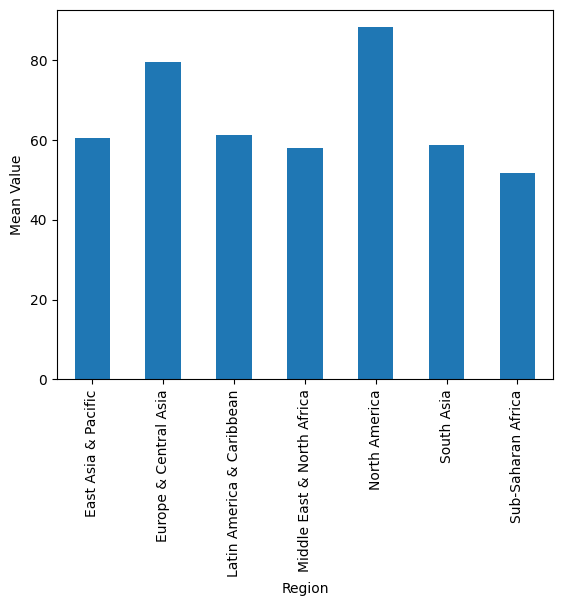

In [18]:
plot_data = dataset.groupby('Region').mean()['SPI']
ax = plot_data.plot.bar()

# Add axes labels
ax.set_xlabel('Region')
ax.set_ylabel('Mean Value')


### Step 3.b: Scatter plot SPI and GDP
- Create a scatter plot of `GDP per capita` on x-axis and `SPI` on y-axis.
- Try with logarithmic scale (add `logx=True` as argument.

<Axes: xlabel='GDP', ylabel='SPI'>

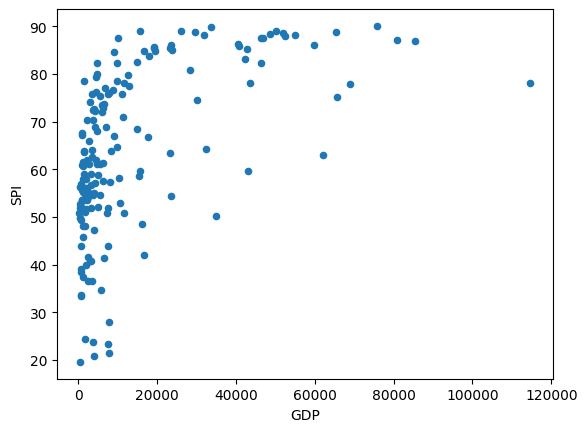

In [21]:
dataset.plot.scatter(x='GDP', y='SPI')

<Axes: xlabel='GDP', ylabel='SPI'>

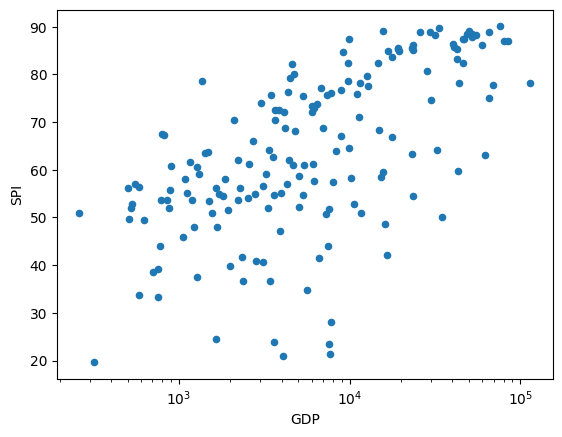

In [22]:
dataset.plot.scatter(x='GDP ', y='SPI', logx = True)

The logarithmic graph illustrates that as countries become wealthier, their GDP experiences exponential growth.

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Sort and make horizontal bar plot
- This will get you started in creating a plot
- Take the regional plot and sort it.
    - HINT: use `.sort_values(ascending=False)`
- Make the plot horizontal
    - HINT: use `.plot.barh()`
- Experiement further to find the plot you like

/tmp/ipykernel_99955/99530484.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('Region').mean()['SPI'].sort_values(ascending=False).plot.barh()


<Axes: ylabel='Region'>

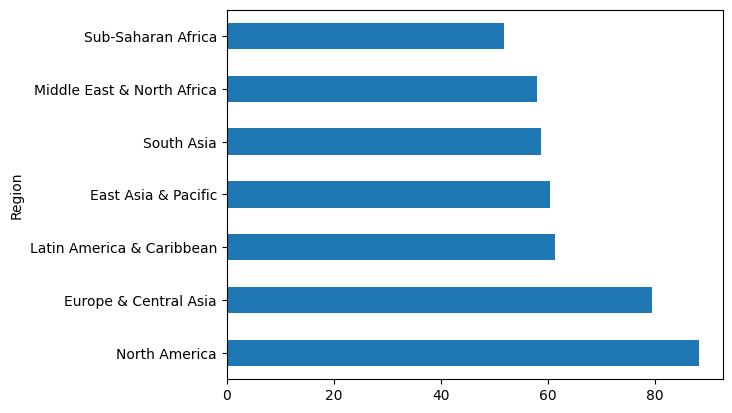

In [23]:
dataset.groupby('Region').mean()['SPI'].sort_values(ascending=False).plot.barh()

### Step 4.b: Add colors to regional plot
- Create a series of the colors based on the regional categories.
    - HINT: Use `factorize()` and assign the first index ([docs](https://pandas.pydata.org/docs/reference/api/pandas.factorize.html)).
- Make a color mapping in the scatter plot
    - HINT: Use argument `c=colors` (assuming you assigned the factorize result to `colors`
- Try to change color maps
    - HINT: Use `cmap='tab10'` (see other color maps in [docs](https://matplotlib.org/stable/tutorials/colors/colormaps.html))
- Play around until you get the plot you like

<Axes: xlabel='GDP', ylabel='SPI'>

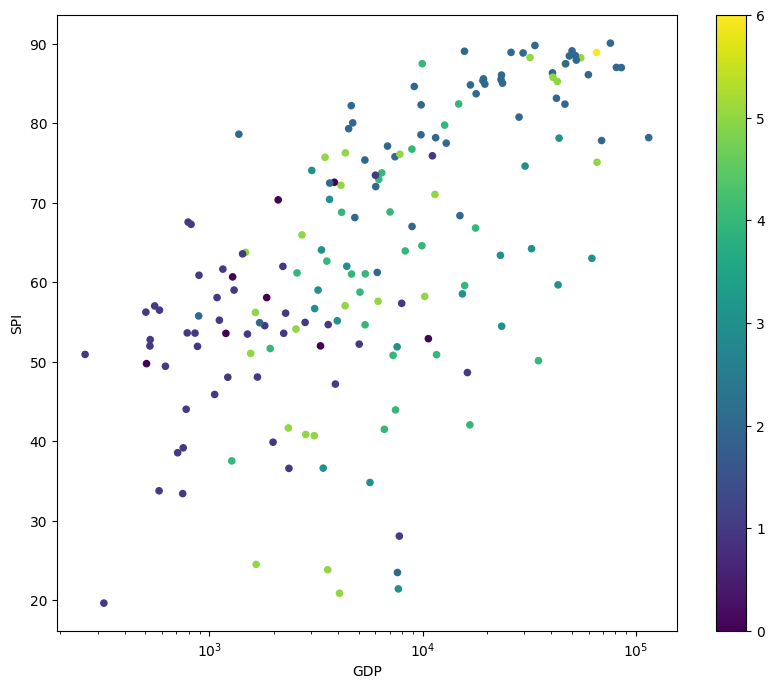

In [26]:
colors = dataset['Region'].factorize()[0]
dataset.plot.scatter(x='GDP', y='SPI', c=colors, colormap='viridis', logx=True, figsize=(10, 8))

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a: Insights

From the data collected and analyzed, it appears that there is a significant correlation between GDP per capita and the Social Progress Index (SPI). The relationship suggests that as a country's GDP per capita increases, its SPI tends to improve as well. This positive correlation may imply that higher levels of income per person contribute to better social outcomes and overall well-being in a society. However, it is essential to consider that correlation does not imply causation, and other factors may also influence the relationship between GDP per capita and SPI. Further research and analysis are necessary to better understand the underlying dynamics and causal relationships between these two indicators. 